In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
colors=sns.color_palette()
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
Default=pd.read_csv("Default.csv")

In [3]:
Default.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [4]:
Default.shape

(10000, 5)

In [5]:
Default=Default[['Defaulted?','Employed','Bank Balance','Annual Salary']]

In [6]:
Default.head()

,Defaulted?,Employed,Bank Balance,Annual Salary
0,0,1,8754.36,532339.56
1,0,0,9806.16,145273.56
2,0,1,12882.60,381205.68
3,0,1,6351.00,428453.88
4,0,1,9427.92,461562.00


In [7]:
Default.columns=['defaulted','employeed','balance','income']

In [8]:
Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   defaulted  10000 non-null  int64  
 1   employeed  10000 non-null  int64  
 2   balance    10000 non-null  float64
 3   income     10000 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 312.6 KB


In [9]:
Default.describe()

,defaulted,employeed,balance,income
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.033300,0.705600,10024.498524,402203.782224
std,0.179428,0.455795,5804.579486,160039.674988
min,0.000000,0.000000,0.000000,9263.640000
25%,0.000000,0.000000,5780.790000,256085.520000
50%,0.000000,1.000000,9883.620000,414631.740000
75%,0.000000,1.000000,13995.660000,525692.760000
max,1.000000,1.000000,31851.840000,882650.760000


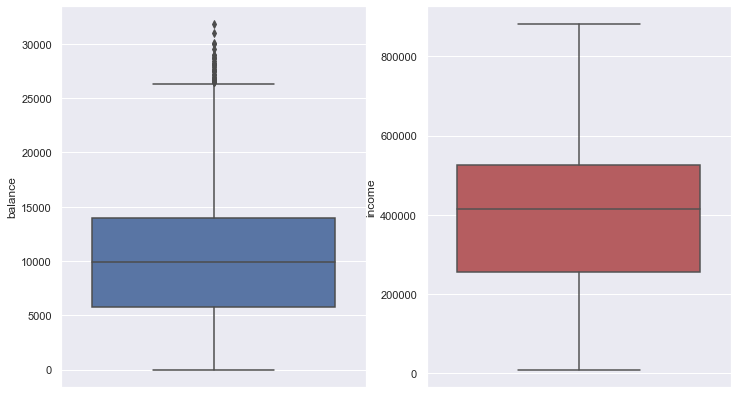

In [10]:
sns.set(style='darkgrid',rc={'figure.figsize':(12,7)})
plt.subplot(1,2,1)
sns.boxplot(y=Default['balance'])
plt.subplot(1,2,2)
sns.boxplot(y=Default['income'],color='r')
plt.show()

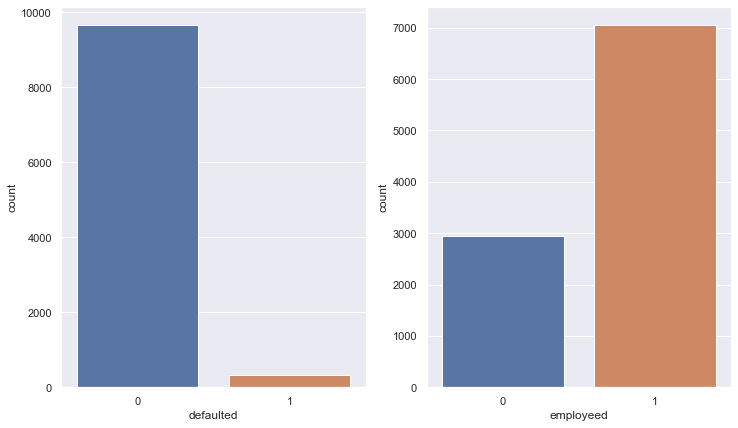

In [11]:
sns.set(style='darkgrid',rc={'figure.figsize':(12,7)})
plt.subplot(1,2,1)
sns.countplot(Default['defaulted'])
plt.subplot(1,2,2)
sns.countplot(Default['employeed'])
plt.show()

In [12]:
Default['employeed'].value_counts()

1    7056
0    2944
Name: employeed, dtype: int64

In [13]:
Default['defaulted'].value_counts()

0    9667
1     333
Name: defaulted, dtype: int64

In [14]:
Default['employeed'].value_counts(normalize=True)

1    0.7056
0    0.2944
Name: employeed, dtype: float64

In [15]:
Default['defaulted'].value_counts(normalize=True)

0    0.9667
1    0.0333
Name: defaulted, dtype: float64

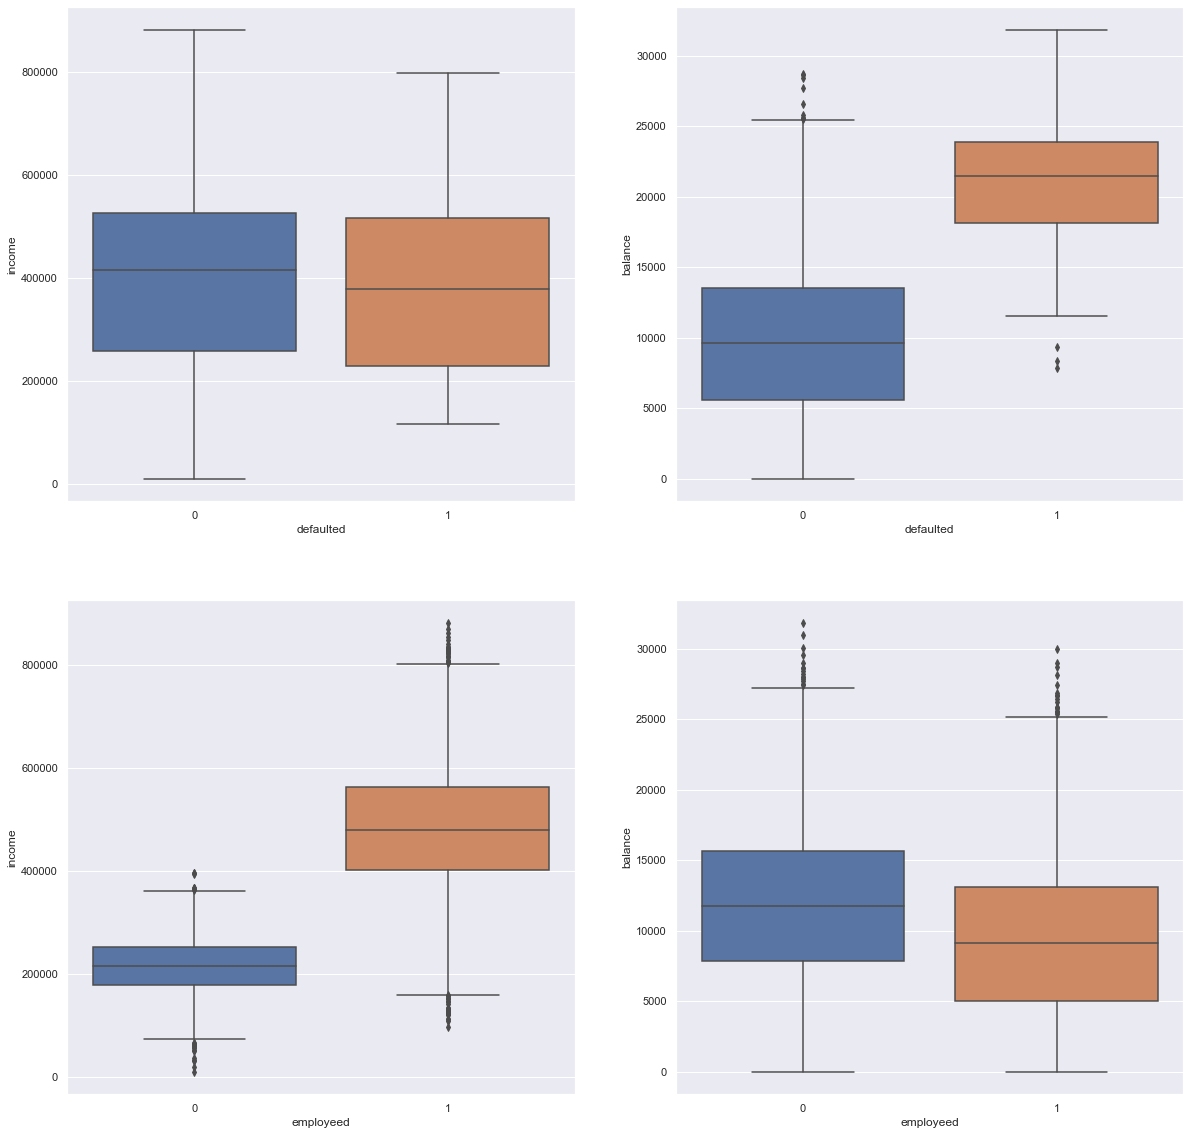

In [16]:
sns.set(style='darkgrid',rc={'figure.figsize':(20,20)}) 
plt.subplot(2,2,1)
sns.boxplot(x='defaulted',y='income',data=Default)
plt.subplot(2,2,2)
sns.boxplot(x='defaulted',y='balance',data=Default)
plt.subplot(2,2,3)
sns.boxplot(x='employeed',y='income',data=Default)
plt.subplot(2,2,4)
sns.boxplot(x='employeed',y='balance',data=Default)
plt.show()

In [17]:
pd.crosstab(Default['employeed'],Default['defaulted'],normalize='index').round(2)

defaulted,0,1
employeed,,
0,0.96,0.04
1,0.97,0.03


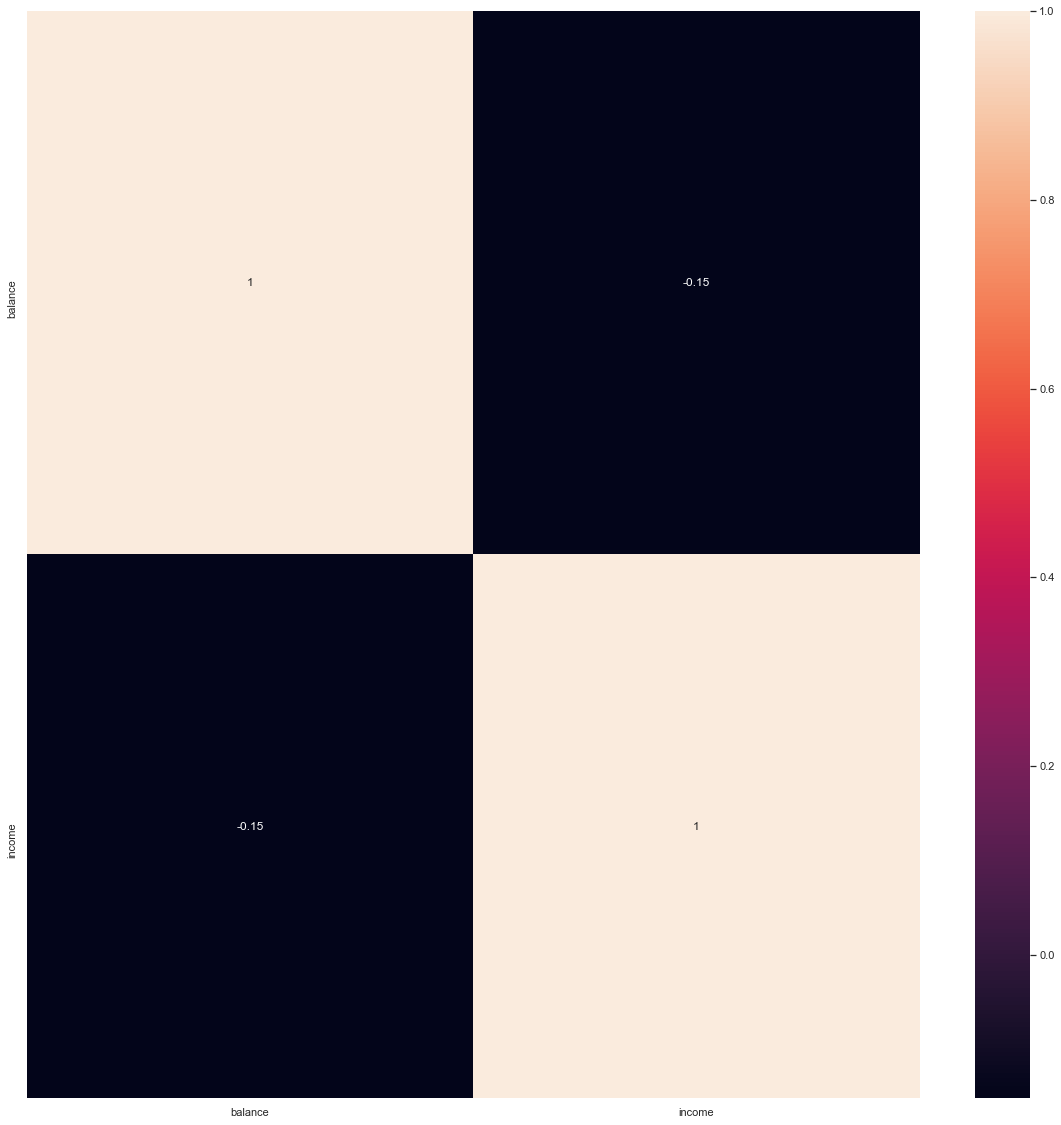

In [22]:
sns.heatmap(Default[['balance','income']].corr(),annot=True)
plt.show()

In [26]:
Default.isnull().sum()

defaulted    0
employeed    0
balance      0
income       0
dtype: int64

In [27]:
Q1,Q3=Default['balance'].quantile([0.25,0.75])
IQR=Q3-Q1

In [28]:
Q1

5780.79

In [29]:
Q3

13995.66

In [30]:
IQR

8214.869999999999

In [32]:
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR

In [33]:
UL

26317.964999999997

In [34]:
LL

-6541.5149999999985

In [35]:
Default['balance'].min()

0.0

In [36]:
df=Default[Default['balance']>UL]

In [37]:
df

,defaulted,employeed,balance,income
173,1,0,26469.60,171257.88
1136,1,1,29988.24,618051.48
1160,1,0,30032.16,179370.24
1359,1,1,26651.64,488701.20
1502,1,0,27994.56,141242.76
1609,1,0,27239.40,216253.32
2096,1,0,27142.20,240362.04
2140,0,0,27706.68,229323.24
2929,1,0,28647.72,339562.92
3162,1,0,28983.84,209154.00


In [38]:
df.count()

defaulted    31
employeed    31
balance      31
income       31
dtype: int64

In [40]:
df['defaulted'].value_counts(normalize=True)

1    0.83871
0    0.16129
Name: defaulted, dtype: float64

In [41]:
df['defaulted'].value_counts()

1    26
0     5
Name: defaulted, dtype: int64

In [43]:
Default['balance']=np.where(Default['balance']>UL,UL,Default['balance'])

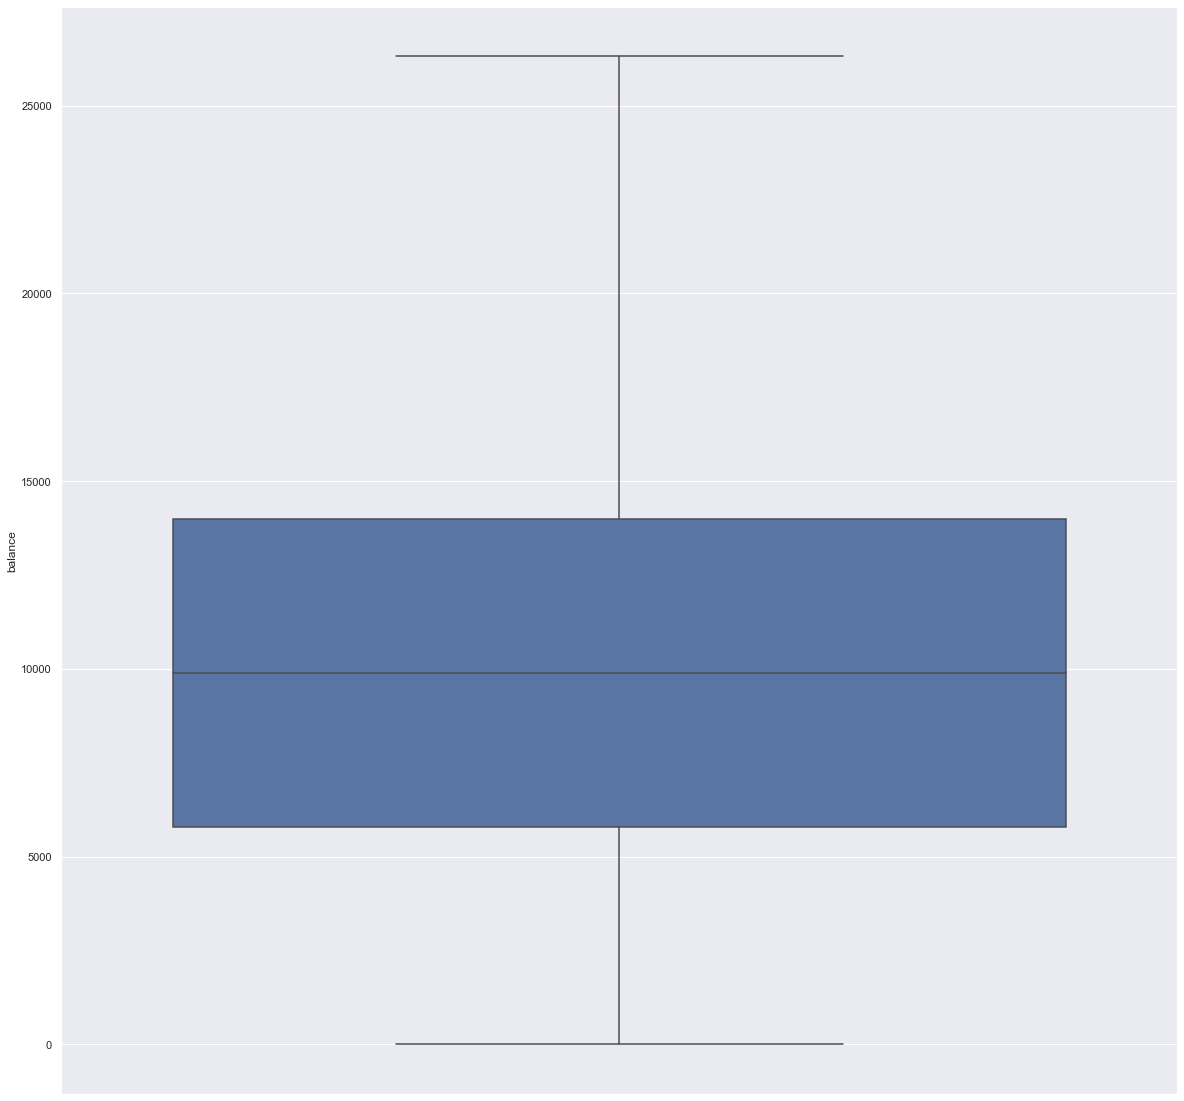

In [45]:
sns.boxplot(y=Default['balance'])
plt.show()

In [47]:
pd.get_dummies(Default,drop_first=False)

,defaulted,employeed,balance,income
0,0,1,8754.36,532339.56
1,0,0,9806.16,145273.56
2,0,1,12882.60,381205.68
3,0,1,6351.00,428453.88
4,0,1,9427.92,461562.00
...,...,...,...,...
9995,0,1,8538.72,635908.56
9996,0,1,9095.52,235928.64
9997,0,1,10144.92,703633.92
9998,0,1,18828.12,440029.32


In [48]:
Default.head()

,defaulted,employeed,balance,income
0,0,1,8754.36,532339.56
1,0,0,9806.16,145273.56
2,0,1,12882.60,381205.68
3,0,1,6351.00,428453.88
4,0,1,9427.92,461562.00


In [50]:
x=Default.drop("defaulted",axis=1)
y=Default['defaulted']

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=21,stratify=y)

In [53]:
y_train.value_counts(normalize=True)

0    0.966714
1    0.033286
Name: defaulted, dtype: float64

In [54]:
y_test.value_counts(normalize=True)

0    0.966667
1    0.033333
Name: defaulted, dtype: float64

In [55]:
!pip install imblearn --quiet

In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
sm=SMOTE(random_state=33,sampling_strategy=0.75)

In [60]:
x_res,y_res=sm.fit_resample(x_train,y_train)

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
lr=LogisticRegression()

In [64]:
lr.fit(x_res,y_res)

LogisticRegression()

In [68]:
y_pred=lr.predict(x_test)

In [70]:
metrics.mean_squared_error(y_test,y_pred)

0.275

In [71]:
metrics.confusion_matrix(y_test,y_pred)

array([[2103,  797],
       [  28,   72]], dtype=int64)